# Entropy
### Entropy formula
$ Entropy = - \frac{m}{m+n}log_2(\frac{m}{m+n})-\frac{n}{m+n}log_2(\frac{n}{m+n}) $

##### Quiz: What is the entropy for a bucket with a ratio of four red balls to ten blue balls?

In [1]:
from math import log

red = 4
blue = 10
total = red + blue

entropy = -(red/total) * log(red/total,2) -(blue/total) * log(blue/total,2)
print(entropy)

0.863120568566631


## Multi-class Entropy
Above, we saw this equation for entropy for a bucket with $m$ red balls and $n$ blue balls.  
$ Entropy = - \frac{m}{m+n}log_2(\frac{m}{m+n})-\frac{n}{m+n}log_2(\frac{n}{m+n}) $

We can state this i nterms of probabilities instead for the number of red balls as $p_1$ and the number of blue balls as $p_2$:  
$p_1=\frac{m}{m+n}$

$p_2=\frac{n}{m+n}$

$entropy = -p_1 log_2(p_1) - p_2 log_2(p_2)$

This entropy equation can be extended to the multi-class case, where we have three or more possible values:  
$entropy = -p_1 log_2(p_1) - p_2 log_2(p_2) - ... -p_n log_2(p_n) = -\sum\limits_{i=1}^{n}p_i log_2(p_i)$

The mininum value is still 0, when all elements are of the same value. The maximum value is still achieved when the outcome probabilities are the same, but the upper limit increases with the number of different outcomes. (For example, you can verify the maximum entropy is 2 if there are four different possibilities, each with probability 0.25).

##### Quiz: If we have a bucket with eight red balls, three blue balls, and two yellow balls, what is the entropy of the set of balls?

In [2]:
from math import log

red = 8
blue = 3
yellow = 2
total = red + blue + yellow
p1 = red/total
p2 = blue/total
p3 = yellow/total

entropy = -p1*log(p1,2) - p2*log(p2,2) - p3*log(p3,2)
print(entropy)

1.3346791410515946


## Information Gain
Information gain is a change in Entropy.

$Information Gain = Entropy(parent) - 0.5[Entropy(child 1) + Entropy(child 2)]$

### Information Gain Formula
Note that the child groups are weighted equally in this case since they're both the same size, for all splits. In general, the average entropy for the child groups will need to be a *weighted* average, based on the number of cases in each child group. That is, for $m$ items in the first child group and $n$ items in the second child group, the information gain is:

$ Information\ Gain = Entropy(\textit{Parent}) - [\frac{m}{m+n} Entropy(\textit{Child_1}) + \frac{n}{m+n} Entropy(\textit{Child_2})] $

#### Quiz: Which of the following splitting criteria provides the most information gain for discriminating Mobugs from Lobugs?

For the following quiz, consider the data found in '*data/ml-bugs.csv*', consisting of twenty-four made-up insects measured on their length and color.

1. Color = Brown
2. Color = Blue
3. Color = Green
4. Length < 17.0mm
5. Length < 20.0mm

In [3]:
import pandas as pd

data = pd.read_csv('data/ml-bugs.csv')

In [29]:
print(data.columns)
print(data.head())

Index(['Species', 'Color', 'Length (mm)'], dtype='object')
  Species  Color  Length (mm)
0   Mobug  Brown         11.6
1   Mobug   Blue         16.3
2   Lobug   Blue         15.1
3   Lobug  Green         23.7
4   Lobug   Blue         18.4


In [42]:
total = len(data)
brown = len(data.loc[data['Color'] =="Brown"])
blue = len(data.loc[data['Color'] =="Blue"])
green = len(data.loc[data['Color'] =="Green"])
#print((brown,blue,green,total))



(6, 10, 8, 24)
1.5545851693377997


In [56]:
def get_ent(item, total):
    return -(item/total)*log(item/total,2)

color_ent = get_ent(brown, total) + get_ent(blue, total) + get_ent(green, total)
print(color_ent) 

1.5545851693377997


In [59]:
less17 = len(data.loc[data['Length (mm)'] < 17 ])

entropy_less17 = get_ent(less17, total) + get_ent(total-less17,total)
print(entropy_less17)

less20 = len(data.loc[data['Length (mm)'] < 20 ])
entropy_less20 = get_ent(less20, total) + get_ent(total-less20,total)
print(entropy_less20)

0.9544340029249649
0.8708644692353646


## Hyperparameters for Decision Trees
In order to create decision trees that will generalize to new problems well, we can tune a number of different aspects about the trees. We call the different aspects of a decision tree "hyperparameters".
These are some of the most important hyperparameters used in decision trees:

### Maximum Depth
The maximum depth of a decision tree is simply the largest possible length between the root of a leaf. A tree of maximum length $k$ can have at most $2^k$ leaves.

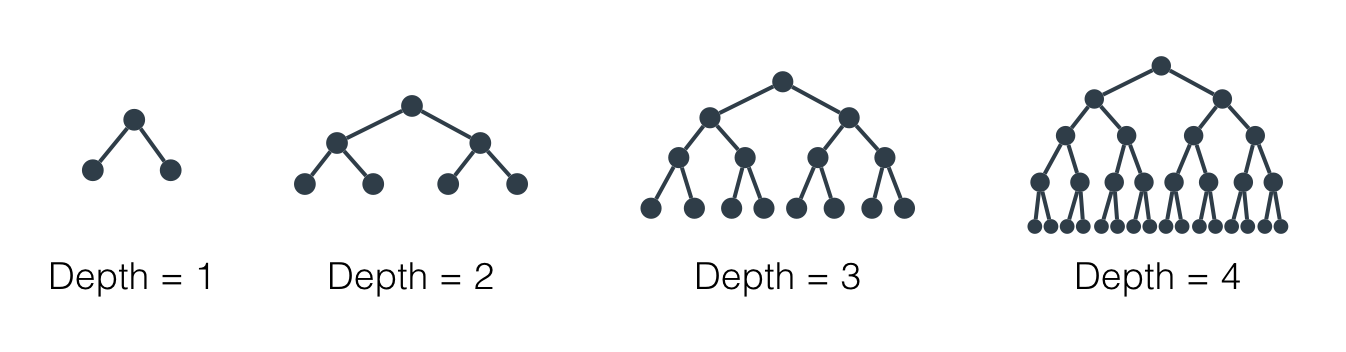

### Minimum number of samples to split
A node must have at least `min_samples_split` samples in order to be large enough to split. If a node has fewer samples than `min_samples_split` samples, it will not be split, and the splitting process stops.

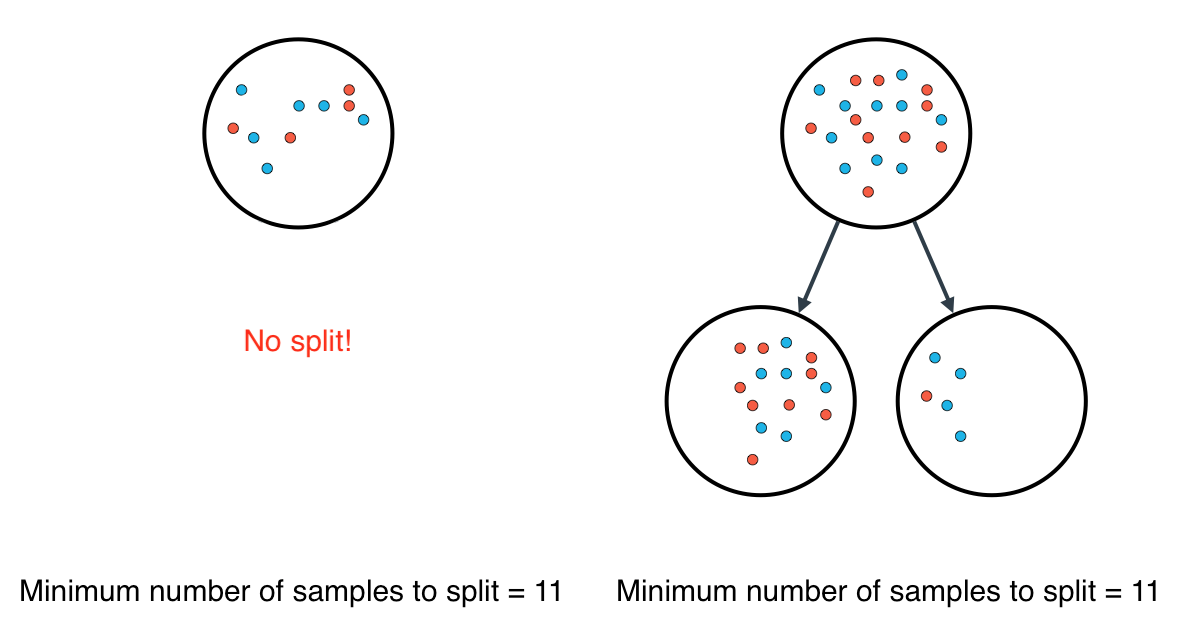

However, `min_samples_split` doesn't control the minimum size of leaves. As you can see in the example on the right, above, the parent node had 20 samples, greater than `min_samples_split = 11`, so the node was split. But when the node was split, a child node was created with that had 5 samples, less than `min_samples_split = 11`.

### Minimum number of samples per leaf
When splitting a node, one could run into the problem of having 99 samples in one of them, and 1 on the other. This will not take us too far in our process, and would be a waste of resources and time. If we want to avoid this, we can set a minimum for the number of samples we allow on each leaf.

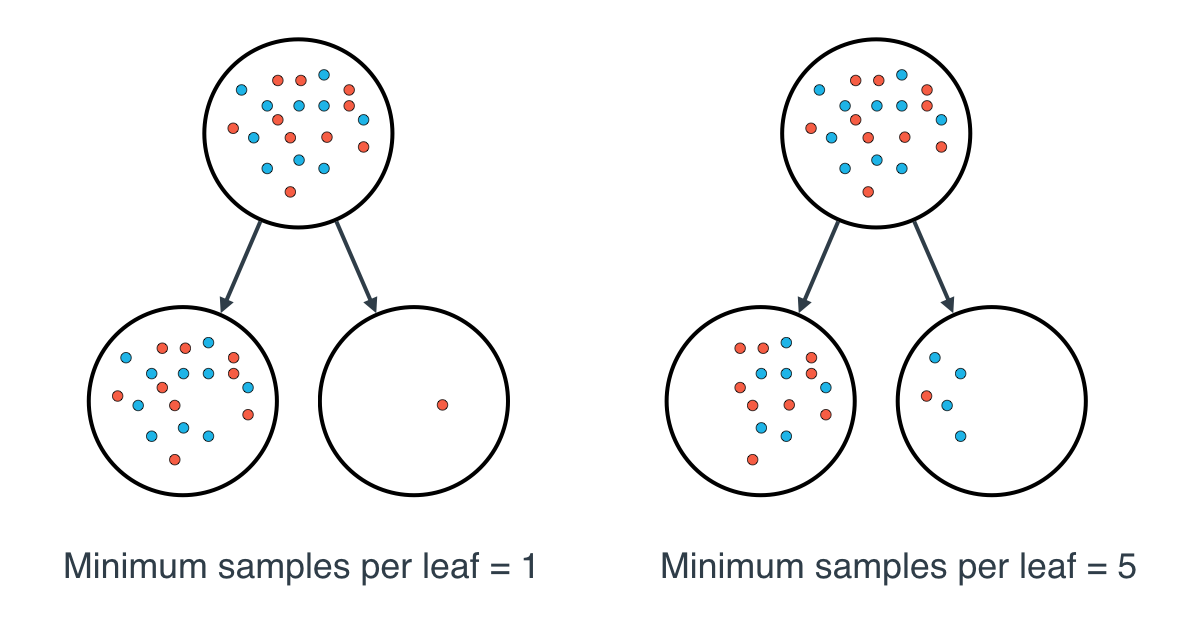

This number can be specified as an integer or as a float. If it's an integer, it's the minimum number of samples allowed in a leaf. If it's a float, it's the minimum percentage of samples allowed in a leaf. For example, 0.1, or 10%, implies that a particular split will not be allowed if one of the leaves that results contains less than 10% of the samples in the dataset.

If a threshold on a feature results in a leaf that has fewer samples than `min_samples_leaf`, the algorithm will not allow *that* split, but it may perform a split on the same feature at a *different threshold*, that *does* satisfy `min_samples_leaf`.

## Decision Trees in sklearn
For our decision tree model, we'll use scikit-learn's [Decision Tree Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) class. This class provides the functions to define and fit the model to our data.

```
>>> from sklearn.tree import DecisionTreeClassifier

>>> model = DecisionTreeClassifier()
>>> mode.fit(x_values, y_values)
```

In the example above, the `model` variable is a decision tree model that has been fitted to the data `x_values` and `y_values`. Fitting the model means finding the best tree that fits the training data. Let's make two predictions using the model's `predict()` function.

```
>>> print(mode.predict([ 0.2, 0.8], [0.5, 0.4]))
[[ 0., 1.]]
```

The model returned an array of predictions, one prediction for each input array. The first input, `[0.2, 0.8]`, got a prediction of `0.`. The second input, `[0.5, 0.4]`, got a prediction of `1.`.

### Hyperparameters
When we define the model, we can specify the hyperparameters. In practice, the most common ones are

* `max_depth`: The maximum number of levels in the tree.
* `min_samples_leaf`: The minimum number of samples allowed in a leaf.
* `min_samples_split`: The minimum number of samples required to split an internal node.

For example, here we define a model where the maximum depth of the trees `max_depth` is 7, and the minimum number of elements in each leaf `min_samples_leaf` is 10.

```
>>> model = DecisionTreeClassifier(max_depth = 7, min_samples_leaf = 10) 
```

### Decision Tree Exercise
In this quiz, we are given the following sample dataset, and the goal is to define a model that gives 100% accuracy on it.

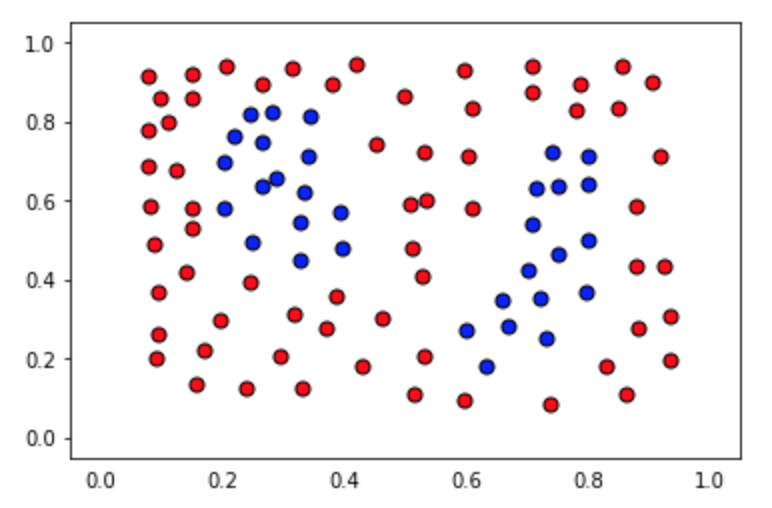

The data can be found in the file '`data/decissiontree.csv`'. It includes three columns, the first 2 comprising of the coordinates of the points, and the third one of the label.

#### 1. Import libraries and load the data

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

data = np.asarray(pd.read_csv('data/decisiontree.csv', header=None))

#### 2. Assign the features to the variable X, and the labels to the variable y.

In [64]:
X = data[:,0:2]
y = data[:,2]

#### 3. Build a decission tree model
Create a decision tree classification model using scikit-learn's [DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and assign it to the variable `model`.

In [66]:
model = DecisionTreeClassifier()

#### 4. Fit the model to the data
We won't need to specify any of the hyperparameters, since the default ones will yield a model that perfectly classifies the training data. However, we can play with hyperparameters such as `max_depth` and `min_samples_leaf` to try to find the *simplest possible* model.

In [67]:
model.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### 5. Predict using the model
Predict the labels for the training set, and assign this list to the variable `y_pred`.

In [69]:
y_pred = model.predict(X)
print(y_pred)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


##### 6. Calculate the accuracy of the model
For this, use the sklearn function [accuracy_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html). A model's **accuracy** is the fraction of all data points that it correctly classified.

In [71]:
acc = accuracy_score(y, y_pred)
print(acc)

1.0


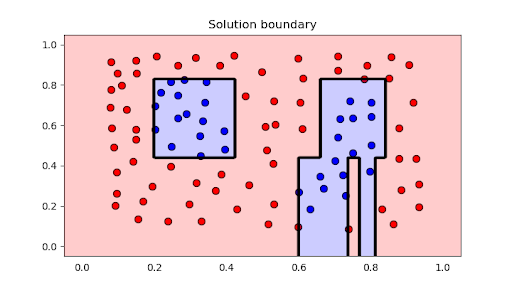

**_Note_**: This exercise requires you to find an accuracy of 100% on the training set. This is like memorizing the training data! A model designated to have 100% accuracy on training data is unlikely to generalize well to new data. If you pick very large values for your parameters, the model will fit the training set very well, but may not generalize well. Try to find the smallest possible parameters to do the job -then the model will be more likely to generalize well.